In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,make_scorer,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_mat = pd.read_pickle('df_mat-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,1,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,2,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
df_mat.shape

(395, 43)

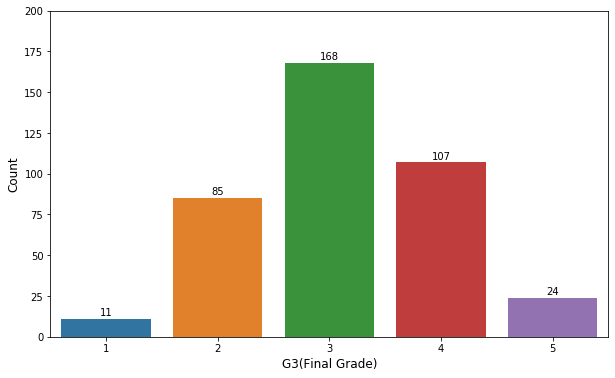

In [4]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3'])
plt.ylim(0,200)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

## Oversampling

In [5]:
X = np.array(df_mat.drop('G3',axis = 1))
y = np.array(df_mat['G3'])

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [7]:
X_train.shape

(316, 42)

In [8]:
sm = SMOTE(k_neighbors = 3,random_state = 42)

In [9]:
X_train,y_train = sm.fit_resample(X_train,y_train)

In [10]:
X_train.shape

(670, 42)

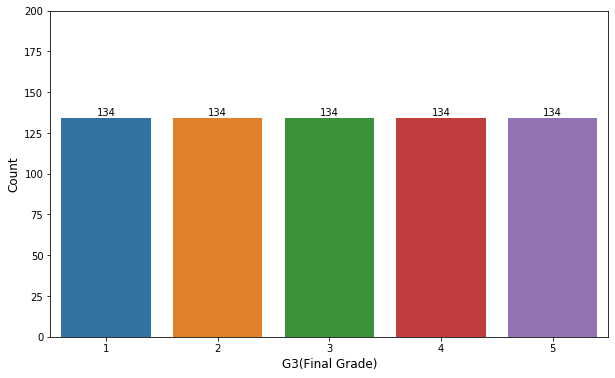

In [11]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_train)
plt.ylim(0,200)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

## Logistic Regression

In [12]:
model = LogisticRegression()

In [13]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.47761194 0.59701493 0.6119403  0.67164179 0.63432836]
Mean Accuracy: 0.60
Standard Deviation: 0.07


In [14]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.55      0.35      0.43        17
           3       0.52      0.68      0.59        34
           4       0.50      0.29      0.36        21
           5       0.43      0.60      0.50         5

    accuracy                           0.49        79
   macro avg       0.44      0.48      0.43        79
weighted avg       0.51      0.49      0.48        79



In [16]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,3
1,3,3
2,5,4
3,1,4
4,3,4


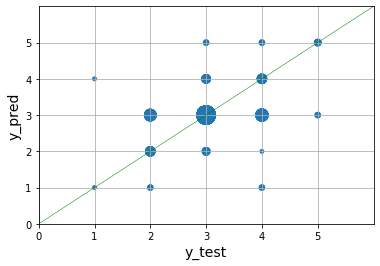

In [17]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [18]:
mean_absolute_error(y_pred,y_test)

0.6455696202531646

In [19]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [20]:
rmse(y_pred,y_test)

1.0

## SVM

In [21]:
model = SVC()

In [22]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.46268657 0.53731343 0.52985075 0.6119403  0.58955224]
Mean Accuracy: 0.55
Standard Deviation: 0.05


In [23]:
parameters = [{'C':[1,10,100],'kernel':['linear']},
              {'C':[1,10,100],'kernel':['rbf'],'gamma':[0.5,0.1,0.001]}]

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [24]:
grid_search.best_score_

0.7835820895522387

In [25]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [26]:
model = SVC(C = 10,kernel = 'rbf',gamma = 0.1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.6119403  0.73134328 0.79104478 0.85820896 0.92537313]
Mean Accuracy: 0.78
Standard Deviation: 0.11


In [27]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.11      0.06      0.08        17
           3       0.44      0.71      0.54        34
           4       0.43      0.29      0.34        21
           5       1.00      0.20      0.33         5

    accuracy                           0.41        79
   macro avg       0.40      0.25      0.26        79
weighted avg       0.39      0.41      0.36        79



In [29]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3,3
1,4,3
2,2,4
3,3,4
4,4,4


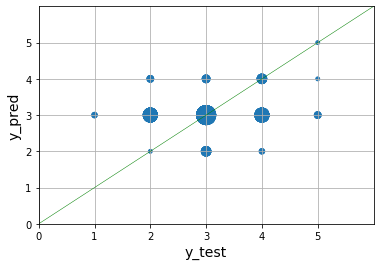

In [30]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [31]:
mean_absolute_error(y_pred,y_test)

0.7215189873417721

In [32]:
rmse(y_pred,y_test)

0.9872606263311616

## KNN

In [33]:
model = KNeighborsClassifier()

In [34]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.6119403  0.64925373 0.67910448 0.74626866 0.81343284]
Mean Accuracy: 0.70
Standard Deviation: 0.07


In [35]:
parameters = {'n_neighbors':[2,5,10,20],'p':[1,3,5]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [36]:
grid_search.best_score_

0.7671641791044775

In [37]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 1}

In [38]:
model = KNeighborsClassifier(n_neighbors = 2,p = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.76865672 0.71641791 0.70149254 0.79104478 0.85820896]
Mean Accuracy: 0.77
Standard Deviation: 0.06


In [39]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.24      0.47      0.32        17
           3       0.42      0.32      0.37        34
           4       0.18      0.10      0.12        21
           5       0.25      0.20      0.22         5

    accuracy                           0.28        79
   macro avg       0.22      0.22      0.21        79
weighted avg       0.30      0.28      0.27        79



In [41]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2,3
1,4,3
2,2,4
3,3,4
4,3,4


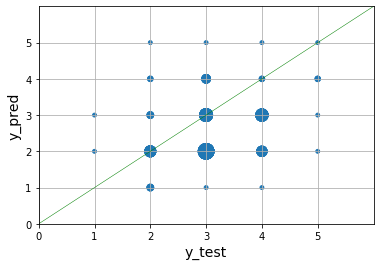

In [42]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [43]:
mean_absolute_error(y_pred,y_test)

0.9620253164556962

In [44]:
rmse(y_pred,y_test)

1.2324720450266415

## Decision Tree Classifier

In [45]:
model = DecisionTreeClassifier()

In [46]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.56716418 0.60447761 0.6641791  0.74626866 0.74626866]
Mean Accuracy: 0.67
Standard Deviation: 0.07


In [47]:
parameters = {'max_depth':[5,15,30],'min_samples_split':[2,10,100],'min_samples_leaf':[1, 5, 10],'max_features':[2,5,11]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [48]:
grid_search.best_score_

0.6597014925373135

In [49]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [50]:
model = DecisionTreeClassifier(max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.58955224 0.58955224 0.69402985 0.7238806  0.76119403]
Mean Accuracy: 0.67
Standard Deviation: 0.07


In [51]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.32      0.35      0.33        17
           3       0.40      0.35      0.38        34
           4       0.38      0.29      0.32        21
           5       0.15      0.40      0.22         5

    accuracy                           0.33        79
   macro avg       0.25      0.28      0.25        79
weighted avg       0.35      0.33      0.33        79



In [53]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3,3
1,4,3
2,3,4
3,5,4
4,4,4


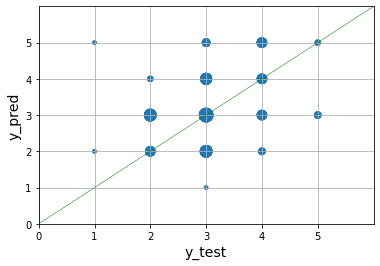

In [54]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [55]:
mean_absolute_error(y_pred,y_test)

0.8734177215189873

In [56]:
rmse(y_pred,y_test)

1.1637999741136082

## Random Forest Classifier

In [57]:
model = RandomForestClassifier()

In [58]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.6119403  0.76865672 0.75373134 0.85820896 0.8880597 ]
Mean Accuracy: 0.78
Standard Deviation: 0.10


In [59]:
parameters = {'n_estimators':[100,500,1000],'max_depth':[5,15,30],'min_samples_split':[2,10,100],'min_samples_leaf':[1,5,10]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [60]:
grid_search.best_score_

0.7776119402985074

In [61]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [62]:
model = RandomForestClassifier(n_estimators = 500,max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.6119403  0.73880597 0.73880597 0.82835821 0.90298507]
Mean Accuracy: 0.76
Standard Deviation: 0.10


In [63]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.31      0.24      0.27        17
           3       0.42      0.68      0.52        34
           4       0.56      0.24      0.33        21
           5       0.50      0.20      0.29         5

    accuracy                           0.42        79
   macro avg       0.36      0.27      0.28        79
weighted avg       0.43      0.42      0.39        79



In [65]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3,3
1,4,3
2,3,4
3,3,4
4,3,4


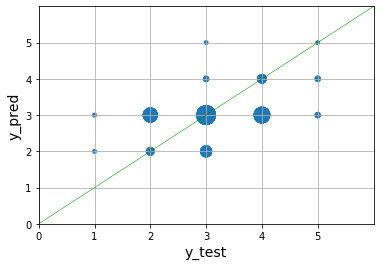

In [66]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [67]:
mean_absolute_error(y_pred,y_test)

0.6329113924050633

In [68]:
rmse(y_pred,y_test)

0.856841417760529

## XGBoost

In [69]:
model = XGBClassifier()

In [70]:
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.57462687 0.7238806  0.69402985 0.82089552 0.82089552]
Mean Accuracy: 0.73
Standard Deviation: 0.09


In [71]:
parameters = {'learning_rate':[0.01,0.1,0.5,1],'gamma':[0.5,0.1,0.001],'max_depth':[2,10,20]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(X_train,y_train)

In [72]:
grid_search.best_score_

0.7537313432835822

In [73]:
grid_search.best_params_

{'gamma': 0.001, 'learning_rate': 1, 'max_depth': 20}

In [74]:
model = XGBClassifier(learning_rate = 0.1,gamma = 0.001,max_depth = 10)
accuracies = cross_val_score(model,X_train,y_train,cv = 5)

print('Accuracies: {}'.format(accuracies))
print('Mean Accuracy: {:0.2f}'.format(accuracies.mean()))
print('Standard Deviation: {:0.2f}'.format(accuracies.std()))

Accuracies: [0.56716418 0.70149254 0.7238806  0.84328358 0.86567164]
Mean Accuracy: 0.74
Standard Deviation: 0.11


In [75]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.43      0.35      0.39        17
           3       0.49      0.68      0.57        34
           4       0.40      0.29      0.33        21
           5       0.00      0.00      0.00         5

    accuracy                           0.44        79
   macro avg       0.26      0.26      0.26        79
weighted avg       0.41      0.44      0.42        79



In [77]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,4,3
1,4,3
2,3,4
3,3,4
4,4,4


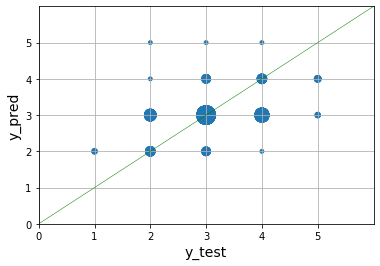

In [78]:
c = Counter(zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [79]:
mean_absolute_error(y_pred,y_test)

0.6455696202531646

In [80]:
rmse(y_pred,y_test)

0.9209241368444986

## Stacking

In [81]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,stratify = y_train,random_state = 42)

### Base Models 

In [82]:
model = SVC(C = 10,kernel = 'rbf',gamma = 0.1)
model.fit(X_base,y_base)

y_pred_svm_meta = model.predict(X_meta)
y_pred_svm_test = model.predict(X_test)

In [83]:
model = KNeighborsClassifier(n_neighbors = 2,p = 1)
model.fit(X_base,y_base)

y_pred_knn_meta = model.predict(X_meta)
y_pred_knn_test = model.predict(X_test)

In [84]:
model = DecisionTreeClassifier(max_depth = 15,min_samples_split = 2,min_samples_leaf = 1)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [85]:
model = RandomForestClassifier(n_estimators = 500,max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [86]:
model = XGBClassifier(learning_rate = 1,gamma = 0.001,max_depth = 20)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [87]:
y_pred_svm_meta = pd.DataFrame(y_pred_svm_meta)
y_pred_knn_meta = pd.DataFrame(y_pred_knn_meta)
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)

df_X_meta = pd.concat([y_pred_svm_meta,y_pred_knn_meta,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta],axis = 1)
df_X_meta.columns = ['y_pred_svm_meta','y_pred_knn_meta','y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta']

df_X_meta.head()

,y_pred_svm_meta,y_pred_knn_meta,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta
0,1,1,1,1,1
1,4,4,4,4,4
2,3,2,2,2,4
3,2,2,2,2,3
4,2,2,3,3,3


In [88]:
y_pred_svm_test = pd.DataFrame(y_pred_svm_test)
y_pred_knn_test = pd.DataFrame(y_pred_knn_test)
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)

df_X_test = pd.concat([y_pred_svm_test,y_pred_knn_test,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test],axis = 1)
df_X_test.columns = ['y_pred_svm_test','y_pred_knn_test','y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test']

df_X_test.head()

,y_pred_svm_test,y_pred_knn_test,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test
0,3,2,3,3,3
1,4,4,4,4,4
2,2,2,3,3,3
3,3,3,2,3,1
4,3,3,3,3,4


### Meta Model 

In [89]:
model = LogisticRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [90]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,3,3
1,4,3
2,2,4
3,2,4
4,3,4


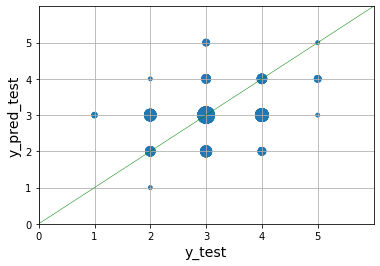

In [91]:
c = Counter(zip(df_temp['y_pred_test'].tolist(),df_temp['y_test'].tolist()))
s = [15 * c[(x,y)] for x,y in zip(df_temp['y_pred_test'].tolist(),df_temp['y_test'].tolist())]

plt.scatter(df_temp['y_test'],df_temp['y_pred_test'],s = s)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [92]:
mean_absolute_error(y_pred_test,y_test)

0.7468354430379747

In [93]:
rmse(y_pred_test,y_test)

1.0125791108334214